<a href="https://colab.research.google.com/github/pachterlab/monod/blob/anndata/Monod_demo_new.ipynb?short_path=e568791" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Monod* on Colab

In the current notebook, we apply *Monod* to identify differentially regulated genes between GABAergic and glutamatergic cell types in a single Allen dataset. 

# Inference pipeline

## Install prerequisites

In [153]:
# # %%capture
# # !pip install -i https://test.pypi.org/simple/ -U --extra-index-url https://pypi.org/simple   monod  
# # !pip install -i https://pypi.org/simple/  monod  
# !pip install monod

Let's make sure that the version is correct.

In [154]:
# !pip show monod

## Import data

In [155]:
# ! git clone https://github.com/pachterlab/monod_examples.git

In [156]:
# !rm -r sample_data

In [157]:
# !mv monod_examples/* .

In [158]:
# !rm -r monod_examples

In [159]:
# !mv sample_data/* .

In [160]:
# !rmdir sample_data

In [161]:
# !cat allen_C01_gaba.tar.gz.* | tar xzvf -

In [162]:
# !mv home/ggorin/projects/monod_examples/sample_data/allen_C01_gaba.loom .

In [163]:
# !cat allen_C01_glu.tar.gz.* | tar xzvf -

In [164]:
# !mv home/ggorin/projects/monod_examples/sample_data/allen_C01_glu.loom .

In [165]:
# !rm -r  ./home

In [166]:
# !rm *.tar.*

## Import package components

In [554]:
# import monod
# from monod import preprocess, extract_data, cme_toolbox, inference, analysis

import matplotlib.pyplot as plt
import numpy as np

In [555]:
import logging, sys
logging.basicConfig(stream=sys.stdout)
log = logging.getLogger()
log.setLevel(logging.INFO)
import warnings
warnings.filterwarnings("ignore") #warning suppression within script is not respected by colab
warnings.simplefilter('ignore')

In [631]:
# execfile("src/monod/preprocess.py")
import sys
sys.path.insert(0, '/home/cat/monod/src/monod')

import extract_data, cme_toolbox, inference, analysis
import importlib

importlib.reload(extract_data)
importlib.reload(inference)
importlib.reload(cme_toolbox)
importlib.reload(analysis)

<module 'analysis' from '/home/cat/monod/src/monod/analysis.py'>

## Set up model and perform inference.

In [619]:
gladata = anndata.read('./glu_example.h5ad')
gladata.layers['spliced'], gladata.layers['unspliced']

/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


(<6629x32285 sparse matrix of type '<class 'numpy.float32'>'
 	with 32029310 stored elements in Compressed Sparse Row format>,
 <6629x32285 sparse matrix of type '<class 'numpy.float32'>'
 	with 26413033 stored elements in Compressed Sparse Row format>)

In [ ]:
Layer: , Non-Zero Entries: 0
Layer: spliced, Non-Zero Entries: 32029310
Layer: unspliced, Non-Zero Entries: 26413033

In [597]:
gadata = anndata.read('./gaba_example.h5ad')

/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
10893422.0
Layer: unspliced, Total Counts: 13226045.0

In [622]:
# Define model.
fitmodel = cme_toolbox.CMEModel('Bursty','Poisson')

DE_genes = ['Rspo3', 'Erbin','Rcan3' ,'Clic4', 'Vrk1']#, 'Lrp12', 'Gatm' ,'Rims3', '1110004F10Rik', 'Tcerg1l', 'Hcrtr2' ]
demo_genes = ['Eif5b','Xrcc5',	'Klhl12','Rgs7','Thsd7b']
# Perform inference. (don't need to give these bounds, here for debugging but can use defaults.)
lb = [-1.0, -1.8, -1.8 ]
ub = [4.2, 2.5, 3.5]
samp_lb, samp_ub = [-8, -3],[-5, 0]
grid = [6,7]
back_gaba_adata = inference.perform_inference('./gaba_example.h5ad', fitmodel, n_genes=5, seed=4, genes_to_fit=demo_genes,
                                       phys_lb=lb, phys_ub=ub, gridsize=grid, samp_lb=samp_lb, samp_ub=samp_ub, gradient_params = {'max_iterations':5,'init_pattern':'moments','num_restarts':1}#,#),
                                        , modality_name_dict={'spliced':'unspliced', 'unspliced': 'spliced'}) #['Eif5b', 'Thsd7b', 'Fbxw2', 'Otud7a', 'Asah1'])glu_adata = inference.perform_inference('./glu_example.h5ad', fitmodel, n_genes=5, seed=4, genes_to_fit=DE_genes,

INFO:root:Directory gaba_example already exists.
INFO:root:Beginning data extraction.
INFO:root:Dataset: gaba_example
is sparse


/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


INFO:root:728 cells detected.


/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


3591 genes retained after expression filter.
INFO:root:0 random genes selected.
INFO:root:Total of 5 genes selected.
['spliced', 'unspliced'] previous ordering
['spliced', 'unspliced'] ordered for histogram
INFO:root:Data extracted
LayersView with keys: spliced, unspliced
['spliced', 'unspliced']
INFO:root:Search data created.
INFO:root:Directory gaba_example/Bursty_Poisson_6x7 already exists.
INFO:root:Global inference parameters stored to gaba_example/Bursty_Poisson_6x7/parameters.pr.
INFO:root:Global inference parameters set.
INFO:root:Starting non-parallelized grid scan.
INFO:root:Non-parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Directory gaba_example/Bursty_Poisson_6x7/analysis_figures already exists.
INFO:root:Grid scan results stored to gaba_example/Bursty_Poisson_6x7/grid_scan_results.res.
INFO:root:Runtime: 40.3 seconds.
INFO:root:Grid points fit.
INFO:root:Optimal parameters found.
INFO:root:Optimal parameters saved.
Layers with 

/home/cat/monod/src/monod/inference.py:110: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  monod_adata.var['param_' + param_name] = param_values


INFO:root:Non-parallelized Hessian computation complete.
INFO:root:Gene 0 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 1 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 3 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 4 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Standard error of the MLE computation complete. Runtime: 1.6 seconds.
INFO:root:Uncertainties per gene calculated.


/home/cat/monod/src/monod/inference.py:1753: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index, :] = np.sqrt(np.diag(hess_inv)) / np.sqrt(


In [632]:
gaba_adata = inference.perform_inference('./gaba_example.h5ad', fitmodel, n_genes=5, seed=4, genes_to_fit=demo_genes,
                                       phys_lb=lb, phys_ub=ub, gridsize=grid, samp_lb=samp_lb, samp_ub=samp_ub, gradient_params = {'max_iterations':5,'init_pattern':'moments','num_restarts':1})

INFO:root:Directory gaba_example already exists.
INFO:root:Beginning data extraction.
INFO:root:Dataset: gaba_example
is sparse


/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


INFO:root:728 cells detected.


/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


3591 genes retained after expression filter.
INFO:root:0 random genes selected.
INFO:root:Total of 5 genes selected.
['unspliced', 'spliced'] previous ordering
['unspliced', 'spliced'] ordered for histogram
INFO:root:Data extracted
LayersView with keys: unspliced, spliced
['unspliced', 'spliced']
INFO:root:Search data created.
INFO:root:Directory gaba_example/Bursty_Poisson_6x7 already exists.
ERROR:root:Global inference parameters could not be stored to gaba_example/Bursty_Poisson_6x7/parameters.pr.
INFO:root:Global inference parameters set.
INFO:root:Starting non-parallelized grid scan.
INFO:root:Non-parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Directory gaba_example/Bursty_Poisson_6x7/analysis_figures already exists.
ERROR:root:Grid scan results could not be stored to gaba_example/Bursty_Poisson_6x7/grid_scan_results.res.
INFO:root:Runtime: 42.5 seconds.
INFO:root:Grid points fit.
INFO:root:Optimal parameters found.
INFO:root:Optimal pa

/home/cat/monod/src/monod/inference.py:110: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  monod_adata.var['param_' + param_name] = param_values


INFO:root:Non-parallelized Hessian computation complete.
INFO:root:Gene 1 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 3 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 4 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Standard error of the MLE computation complete. Runtime: 1.7 seconds.
INFO:root:Uncertainties per gene calculated.


/home/cat/monod/src/monod/inference.py:1753: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index, :] = np.sqrt(np.diag(hess_inv)) / np.sqrt(


In [634]:
back_gaba_adata = inference.perform_inference('./gaba_example.h5ad', fitmodel, n_genes=5, seed=4, genes_to_fit=demo_genes,
                                       phys_lb=lb, phys_ub=ub, gridsize=grid, samp_lb=samp_lb, samp_ub=samp_ub, gradient_params = {'max_iterations':5,'init_pattern':'moments','num_restarts':1}#,#),
                                        , modality_name_dict={'spliced':'unspliced', 'unspliced': 'spliced'}) #['Eif5b', 'Thsd7b', 'Fbxw2', 'Otud7a', 'Asah1'])glu_adata = inference.perform_inference('./glu_example.h5ad', fitmodel, n_genes=5, seed=4, genes_to_fit=DE_genes,

INFO:root:Directory gaba_example already exists.
INFO:root:Beginning data extraction.
INFO:root:Dataset: gaba_example
is sparse


/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


INFO:root:728 cells detected.


/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


3591 genes retained after expression filter.
INFO:root:0 random genes selected.
INFO:root:Total of 5 genes selected.
['spliced', 'unspliced'] previous ordering
['spliced', 'unspliced'] ordered for histogram
INFO:root:Data extracted
LayersView with keys: spliced, unspliced
['spliced', 'unspliced']
INFO:root:Search data created.
INFO:root:Directory gaba_example/Bursty_Poisson_6x7 already exists.
ERROR:root:Global inference parameters could not be stored to gaba_example/Bursty_Poisson_6x7/parameters.pr.
INFO:root:Global inference parameters set.
INFO:root:Starting non-parallelized grid scan.
INFO:root:Non-parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Directory gaba_example/Bursty_Poisson_6x7/analysis_figures already exists.
ERROR:root:Grid scan results could not be stored to gaba_example/Bursty_Poisson_6x7/grid_scan_results.res.
INFO:root:Runtime: 43.7 seconds.
INFO:root:Grid points fit.
INFO:root:Optimal parameters found.
INFO:root:Optimal pa

/home/cat/monod/src/monod/inference.py:110: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  monod_adata.var['param_' + param_name] = param_values


INFO:root:Non-parallelized Hessian computation complete.
INFO:root:Gene 0 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 1 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 3 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 4 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Standard error of the MLE computation complete. Runtime: 2.9 seconds.
INFO:root:Uncertainties per gene calculated.


/home/cat/monod/src/monod/inference.py:1753: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index, :] = np.sqrt(np.diag(hess_inv)) / np.sqrt(


In [636]:
glu_adata = inference.perform_inference('./glu_example.h5ad', fitmodel, n_genes=5, seed=4, genes_to_fit=DE_genes,
                                       phys_lb=lb, phys_ub=ub, gridsize=grid, samp_lb=samp_lb, samp_ub=samp_ub, gradient_params = {'max_iterations':5,'init_pattern':'moments','num_restarts':1}) #['Eif5b', 'Thsd7b', 'Fbxw2', 'Otud7a', 'Asah1'])glu_adata = inference.perform_inference('./glu_example.h5ad', fitmodel, n_genes=5, seed=4, genes_to_fit=DE_genes,

INFO:root:Directory glu_example already exists.
INFO:root:Beginning data extraction.
INFO:root:Dataset: glu_example


/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


is sparse


/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


INFO:root:6629 cells detected.


/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


5545 genes retained after expression filter.
INFO:root:0 random genes selected.
INFO:root:Total of 5 genes selected.
['unspliced', 'spliced'] previous ordering
['unspliced', 'spliced'] ordered for histogram
INFO:root:Data extracted
LayersView with keys: unspliced, spliced
['unspliced', 'spliced']
INFO:root:Search data created.
INFO:root:Directory glu_example/Bursty_Poisson_6x7 already exists.
ERROR:root:Global inference parameters could not be stored to glu_example/Bursty_Poisson_6x7/parameters.pr.
INFO:root:Global inference parameters set.
INFO:root:Starting non-parallelized grid scan.
INFO:root:Non-parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Directory glu_example/Bursty_Poisson_6x7/analysis_figures already exists.
ERROR:root:Grid scan results could not be stored to glu_example/Bursty_Poisson_6x7/grid_scan_results.res.
INFO:root:Runtime: 27.8 seconds.
INFO:root:Grid points fit.
INFO:root:Optimal parameters found.
INFO:root:Optimal parame

/home/cat/monod/src/monod/inference.py:110: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  monod_adata.var['param_' + param_name] = param_values


INFO:root:Non-parallelized Hessian computation complete.
INFO:root:Gene 0 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 2 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Standard error of the MLE computation complete. Runtime: 1.1 seconds.
INFO:root:Uncertainties per gene calculated.


/home/cat/monod/src/monod/inference.py:1753: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index, :] = np.sqrt(np.diag(hess_inv)) / np.sqrt(


In [637]:
back_glu_adata = inference.perform_inference('./glu_example.h5ad', fitmodel, n_genes=5, seed=4, genes_to_fit=DE_genes,
                                       phys_lb=lb, phys_ub=ub, gridsize=grid, samp_lb=samp_lb, samp_ub=samp_ub, gradient_params = {'max_iterations':5,'init_pattern':'moments','num_restarts':1}#,#),
                                        ,modality_name_dict={'spliced':'unspliced', 'unspliced': 'spliced'})

INFO:root:Directory glu_example already exists.
INFO:root:Beginning data extraction.
INFO:root:Dataset: glu_example


/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


is sparse


/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


INFO:root:6629 cells detected.


/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


5545 genes retained after expression filter.
INFO:root:0 random genes selected.
INFO:root:Total of 5 genes selected.
['spliced', 'unspliced'] previous ordering
['spliced', 'unspliced'] ordered for histogram
INFO:root:Data extracted
LayersView with keys: spliced, unspliced
['spliced', 'unspliced']
INFO:root:Search data created.
INFO:root:Directory glu_example/Bursty_Poisson_6x7 already exists.
ERROR:root:Global inference parameters could not be stored to glu_example/Bursty_Poisson_6x7/parameters.pr.
INFO:root:Global inference parameters set.
INFO:root:Starting non-parallelized grid scan.
INFO:root:Non-parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Directory glu_example/Bursty_Poisson_6x7/analysis_figures already exists.
ERROR:root:Grid scan results could not be stored to glu_example/Bursty_Poisson_6x7/grid_scan_results.res.
INFO:root:Runtime: 25.7 seconds.
INFO:root:Grid points fit.
INFO:root:Optimal parameters found.
INFO:root:Optimal parame

/home/cat/monod/src/monod/inference.py:110: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  monod_adata.var['param_' + param_name] = param_values


INFO:root:Non-parallelized Hessian computation complete.
INFO:root:Gene 4 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Standard error of the MLE computation complete. Runtime: 1.1 seconds.
INFO:root:Uncertainties per gene calculated.


/home/cat/monod/src/monod/inference.py:1753: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index, :] = np.sqrt(np.diag(hess_inv)) / np.sqrt(


In [638]:
display(back_glu_adata.var[[i for i in new_adata.var.keys() if 'param' in i]])
display(glu_adata.var[[i for i in new_adata.var.keys() if 'param' in i]])

,param_$\log_{10} b$,param_$\log_{10} \beta$,param_$\log_{10} \gamma$
gene_name,,,
Rspo3,4.181864,-0.088779,1.946648
Vrk1,4.163138,0.026476,2.113753
Erbin,4.200000,0.347422,2.290103
Rcan3,4.200000,0.608347,3.119962
Clic4,4.200000,0.720419,3.028685


,param_$\log_{10} b$,param_$\log_{10} \beta$,param_$\log_{10} \gamma$
gene_name,,,
Rspo3,4.200000,-0.483785,2.288926
Vrk1,4.200000,-0.340463,2.569986
Erbin,4.179988,-0.227989,2.554428
Rcan3,4.200000,0.660918,3.062265
Clic4,4.056131,0.931859,3.302492


In [639]:
display(gaba_adata.var[[i for i in new_adata.var.keys() if 'param' in i]])
display(back_gaba_adata.var[[i for i in new_adata.var.keys() if 'param' in i]])


,param_$\log_{10} b$,param_$\log_{10} \beta$,param_$\log_{10} \gamma$
gene_name,,,
Eif5b,4.200000,-0.683932,1.689995
Xrcc5,4.200000,-0.648089,2.652908
Klhl12,4.200000,-0.555310,2.568250
Rgs7,4.200000,-1.800000,1.924777
Thsd7b,4.064239,-1.433109,3.003605


,param_$\log_{10} b$,param_$\log_{10} \beta$,param_$\log_{10} \gamma$
gene_name,,,
Eif5b,4.200000,-1.304080,1.790092
Xrcc5,4.199995,-0.716017,2.148833
Klhl12,4.200000,-0.419430,1.931197
Rgs7,4.200000,-1.058574,-1.800000
Thsd7b,2.178580,-1.727157,-0.604352


In [624]:
display(gaba_adata.var[[i for i in new_adata.var.keys() if 'param' in i]])
display(back_gaba_adata.var[[i for i in new_adata.var.keys() if 'param' in i]])


,param_$\log_{10} b$,param_$\log_{10} \beta$,param_$\log_{10} \gamma$
gene_name,,,
Eif5b,4.200000,-0.683932,1.689995
Xrcc5,4.200000,-0.648089,2.652908
Klhl12,4.200000,-0.555310,2.568250
Rgs7,4.200000,-1.800000,1.924777
Thsd7b,4.064239,-1.433109,3.003605


,param_$\log_{10} b$,param_$\log_{10} \beta$,param_$\log_{10} \gamma$
gene_name,,,
Eif5b,4.200000,-1.304080,1.790092
Xrcc5,4.199995,-0.716017,2.148833
Klhl12,4.200000,-0.419430,1.931197
Rgs7,4.200000,-1.058574,-1.800000
Thsd7b,2.178580,-1.727157,-0.604352


In [489]:
# # NB currently can't save whole object to file since some .uns attributes cannot be pickled.
# gaba_adata.write('gaba_fit.h5ad')
# gaba_adata.write('glu_fit.h5ad')

## Access gene info.

In [606]:
# AIC.
display(glu_adata.var[['AIC']])

# Optimum biological parameters.
display(glu_adata.var[[i for i in new_adata.var.keys() if 'param' in i]])

# Uncertainties from Hessian.
display(glu_adata.var[[i for i in new_adata.var.keys() if 'sigma' in i]])

,AIC
gene_name,
Rspo3,22303.067618
Vrk1,15973.499341
Erbin,14245.800285
Rcan3,4456.918682
Clic4,2970.230804


,param_$\log_{10} b$,param_$\log_{10} \beta$,param_$\log_{10} \gamma$
gene_name,,,
Rspo3,4.200000,-0.483785,2.288926
Vrk1,4.200000,-0.340463,2.569986
Erbin,4.179988,-0.227989,2.554428
Rcan3,4.200000,0.660918,3.062265
Clic4,4.056131,0.931859,3.302492


,sigma_$\log_{10} b$,sigma_$\log_{10} \beta$,sigma_$\log_{10} \gamma$
gene_name,,,
Rspo3,4.200000,-0.483785,2.288926
Vrk1,4.200000,-0.340463,2.569986
Erbin,4.179988,-0.227989,2.554428
Rcan3,4.200000,0.660918,3.062265
Clic4,4.056131,0.931859,3.302492


In [610]:
# AIC.
display(gaba_adata.var[['AIC']])

# Optimum biological parameters.
display(gaba_adata.var[[i for i in new_adata.var.keys() if 'param' in i]])

# Uncertainties from Hessian.
display(gaba_adata.var[[i for i in new_adata.var.keys() if 'sigma' in i]])

,AIC
gene_name,
Rspo3,1176.232493
Vrk1,2947.318850
Erbin,5697.243341
Rcan3,2709.057468
Clic4,1920.020728


,param_$\log_{10} b$,param_$\log_{10} \beta$,param_$\log_{10} \gamma$
gene_name,,,
Rspo3,4.2,-0.071408,3.262791
Vrk1,4.2,-0.538264,2.613994
Erbin,4.2,-1.313732,2.224259
Rcan3,4.2,-0.421463,2.473926
Clic4,4.2,0.348681,2.662354


,sigma_$\log_{10} b$,sigma_$\log_{10} \beta$,sigma_$\log_{10} \gamma$
gene_name,,,
Rspo3,4.2,-0.071408,3.262791
Vrk1,4.2,-0.538264,2.613994
Erbin,4.2,-1.313732,2.224259
Rcan3,4.2,-0.421463,2.473926
Clic4,4.2,0.348681,2.662354


Plot parameter distributions.

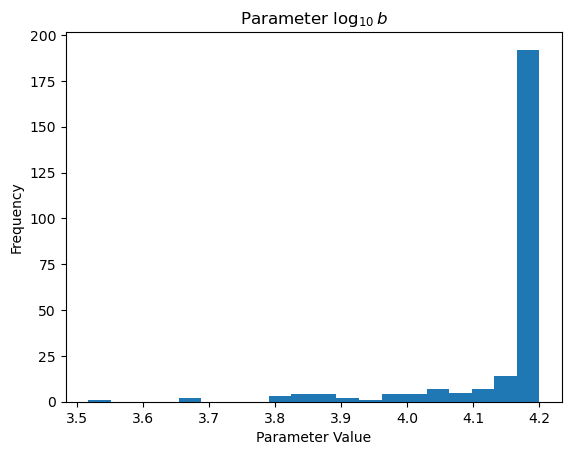

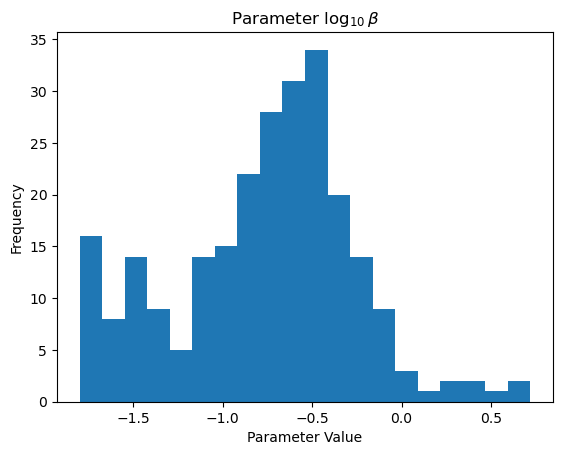

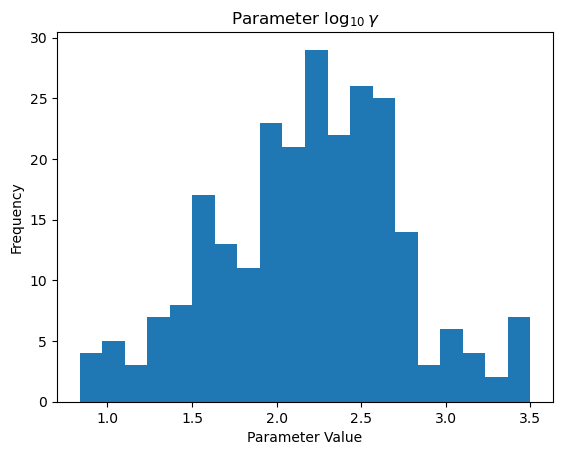

In [540]:
param_names = [i for i in new_adata.var.keys() if 'param' in i]
for name in param_names:
    plt.hist(glu_adata.var[name], bins=20)
    plt.title('Parameter ' + name[6:])
    plt.xlabel('Parameter Value')
    plt.ylabel('Frequency')
    # plt.savefig(search_result.inference_string + '/parameter_dist_'+ str(i))#'/parameter_dist_{}'.format(
    plt.show()

# Analysis (to be implemented)

## Reject genes.

In [ ]:
# # Add rejection filter to adata.
gaba_adata = inference.reject_genes(gaba_adata, reject_at_bounds=False)#, threshold=-1, use_hellinger=False, reject_at_bounds=False)
glu_adata = inference.reject_genes(glu_adata, reject_at_bounds=False)#, threshold=-1, use_hellinger=False, reject_at_bounds=False)

# Show rejected genes.
display(glu_adata.var[['rejected_genes', 'csq', 'pval']])
display(gaba_adata.var[['rejected_genes', 'csq', 'pval']])

# # Save chi-square values.
chi_squareds_glu,  chi_squareds_gaba = glu_adata.var['csq'], gaba_adata.var['csq']

## Execute differential expression analysis.

/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:1986: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/cat/monod/src/monod/analysis.py:758: RuntimeWarning: divide by zero encountered in divide
  z = (resid - fitparams[0]) / fitparams[1]
/home/cat/monod/src/monod/analysis.py:758: RuntimeWarning: invalid value encountered in divide
  z = (resid - fitparams[0]) / fitparams[1]


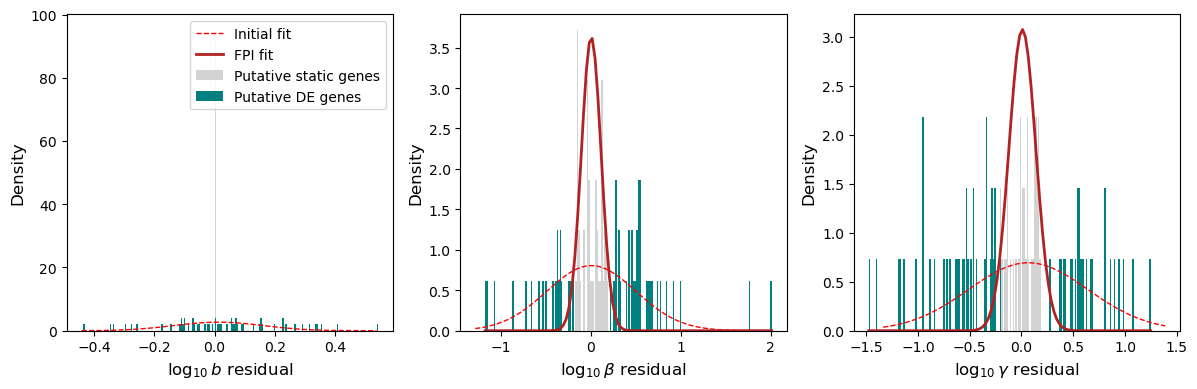

In [543]:
# Compute FCs and p-values between groups in adata.
# This function should also store this information as .uns matrices in adata.

DE_genes, DE_filter, offs, residuals = analysis.DE_parameters(glu_adata, gaba_adata, viz=True, pval_thr=0.1)

# # For two different objects, this is implemented in Monod.
# gn: list of lists of str
#         list of size n_phys_pars. each entry contains names of genes identified as DE with respect
#         to each parameter.
#     gf: bool np.ndarray
#         an n_phys_pars x n_genes array. if True, the gene has been identified as DE with respect to
#         the parameter.
#     offs: float np.ndarray
#         an n_phys_pars x n_model_pars array. contains (b) or (b,a) for each physical parameter.
#         b should typically be fairly small (under 0.5).
#     resid: float np.ndarray
#         an n_phys_pars x n_genes array. contains residuals for each parameter under the final
#         fit statistical model.

print(DE_genes)
# FCs, p_values = analysis.DE(adata)

In [553]:
# # NB changing loom to h5ad.
# adata_gaba = anndata.read_loom('monod_examples/sample_data/allen_C01_gaba.loom')
# adata_gaba.var_names = adata_gaba.var['gene_name']
# adata_gaba.obs_names = adata_gaba.obs['barcode']
# adata_gaba.obs = adata_gaba.obs.drop(columns=['barcode'])
# adata_gaba.var = adata_gaba.var.drop(columns=['gene_name'])
# adata_gaba.write('gaba_example.h5ad')

### Show some gene distributions.

[0 1 2]
Rspo3
Erbin
Gatm


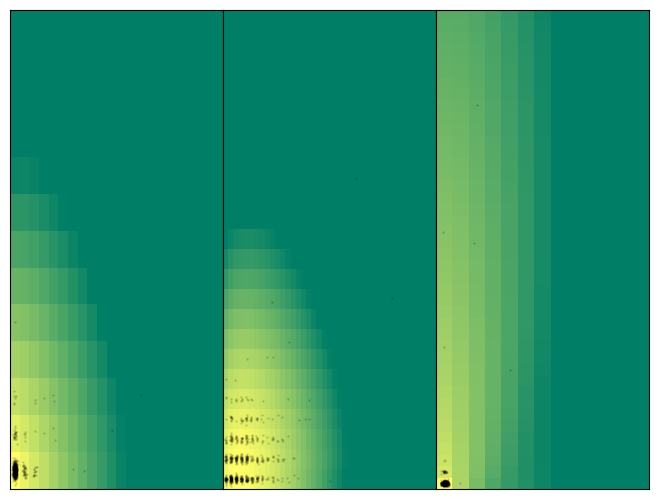

In [517]:
fitted_adata = glu_adata

search_result, search_data = fitted_adata.uns['search_result'], fitted_adata.uns['search_data']
logscale = True

sz =(1,3)
(nrows, ncols) = sz
fig1, ax1 = plt.subplots(nrows=nrows, ncols=ncols)

nax = np.prod(sz)

genes_to_plot = np.arange(nax)

genes_to_plot = np.asarray(genes_to_plot)
if genes_to_plot.dtype == bool:
    gtp_temp = np.arange(self.n_genes)
    genes_to_plot = gtp_temp[genes_to_plot]

number_of_genes_to_plot = len(genes_to_plot)
if number_of_genes_to_plot > 5:
    number_of_genes_to_plot = 5
    genes_to_plot = genes_to_plot[: 5]
if number_of_genes_to_plot > nax:  # This should no longer break...
    number_of_genes_to_plot = nax
    genes_to_plot = genes_to_plot[:nax]

j_ = 0
marg = 'joint'
modalities = ['spliced', 'unspliced']

print(genes_to_plot)
for i_ in genes_to_plot:
    lm = np.copy(search_data.M[:, i_])
    
    # TODO: generalize by adding attribute names as attribute of e.g. CMEModel
    # attributes = ['unspliced', 'spliced', 'protein']
    
    num_modalities = 2
    for i in range(num_modalities):
        if marg == modalities[i]:
            lm[:i] = 1
            lm[i+1:]=1
            
    axloc = np.unravel_index(j_, sz) if (sz[0] > 1 and sz[1] > 1) else j_

    samp = search_result.regressor_optimum[i_]
    Pa = np.squeeze(search_result.model.eval_model_pss(search_result.phys_optimum[i_], lm, samp))
    layers = np.array([i.copy() for i in search_data.layers])
    
    marg = 'joint'
    if marg == "joint":
        if logscale:
            Pa[Pa < 1e-10] = 1e-10
            Pa = np.log10(Pa)

        if num_modalities==2:
            ax1[axloc].imshow(Pa.T, aspect="auto", cmap="summer")
        elif num_modalities==3:
            ax1[axloc].imshow(Pa.sum(axis=2).T, aspect="auto", cmap="summer")
        else:
            log.error('Joint distribution plot only implemented for 2 or 3 modalities')
            
        ax1[axloc].invert_yaxis()

        jitter_magn = 0.1
        jitter = np.random.randn(2, search_result.n_cells) * jitter_magn
        ax1[axloc].scatter(
            *layers[:2, :,i_] + jitter, c="k", s=1, alpha=0.1
        )

        ax1[axloc].set_xlim([-0.5, search_data.M[0, i_] - 1.5])
        ax1[axloc].set_ylim([-0.5, search_data.M[1, i_] - 1.5])
    else:
        plot_hist_and_fit(ax1[axloc], search_data, i_, Pa, marg)
        if logscale:
            ax1[axloc].set_yscale("log")

    print(search_result.gene_names.index[i_])
    # if title:
    #     titlestr = search_result.gene_names[i_]
    #     if hasattr(search_result, "rejected_genes") and search_result.rejected_genes[i_]:
    #         titlestr += " (rej.)"
    #     ax1[axloc].set_title(titlestr, fontdict={"fontsize": 9})
    ax1[axloc].set_xticks([])
    ax1[axloc].set_yticks([])
    j_ += 1
fig1.tight_layout(pad=0.02)
